In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Part barra M31 GADGET - tenform no normalizado lbar

In [20]:
import h5py
import rotation as rot
import tenform as ten
from numpy import linalg
import barstrength2 as strng

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

atime = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]

data = np.loadtxt('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_lbarvstime.dat')
lbar1 = data[:,1]
lbar2 = data[:,2]



snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_496.h5py', 'r')
    
cm   = snap['subhalo_000/Center'].value
r200 = snap['subhalo_000/R200'].value

pstr = snap['subhalo_000/Str/Coordinates'].value
mstr = snap['subhalo_000/Str/Masses'].value
vel  = snap['subhalo_000/Str/Velocities'].value

z = a0/aexp[0] - 1.
Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
xstr = (pstr[:,0]-cm[0])*aexp[0]/h
ystr = (pstr[:,1]-cm[1])*aexp[0]/h
zstr = (pstr[:,2]-cm[2])*aexp[0]/h
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

v_x = vel[:,0] *np.sqrt(aexp[0]) + Ht *xstr/1000.
v_y = vel[:,1] *np.sqrt(aexp[0]) + Ht *ystr/1000.
v_z = vel[:,2] *np.sqrt(aexp[0]) + Ht *zstr/1000.
#----------------------masas----------------------------
mstr = mstr/h

r200 = r200*aexp[0]/h

#         print 'r200 =', r200
rgal=0.15*r200

limit    = np.where(rstr<rgal)
r_sort   = np.sort(rstr[limit])
r_indice = np.argsort(rstr[limit])

Mgal_str = cumsum((mstr[limit])[r_indice])
M_gal = Mgal_str[-1]

razon      = Mgal_str/M_gal
noventa,   = np.where(razon < 0.9)
cincuenta, = np.where(razon < 0.5)

r90 = r_sort[noventa][-1]
r50 = r_sort[cincuenta][-1]
#--------------------------------------------------------------       

veloc, = np.where(rstr < r50)

vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#velocidades de las estrellas respecto del centro de masa de la galaxia
vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

#-------------------------------------------------------------------------------------
#hago la rotación de las coordenadas respecto del momento angular    

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp[0])

xn = e1x*xstr + e1y*ystr + e1z*zstr
yn = e2x*xstr + e2y*ystr + e2z*zstr
zn = e3x*xstr + e3y*ystr + e3z*zstr
vxn = e1x*vx + e1y*vy + e1z*vz
vyn = e2x*vx + e2y*vy + e2z*vz
vzn = e3x*vx + e3y*vy + e3z*vz

corte, = np.where(rstr < 3*aexp[0])

A2max, rmax, phimax = strng.a2max(mstr[corte], xn[corte], yn[corte], 20)

xx = xn*cos(phimax)+yn*sin(phimax)
yy = xn*-sin(phimax)+yn*cos(phimax)
zz = zn


#----para lbar1--------------------------------------------------------------
limit1,=np.where(rstr < lbar1[0])
tensor = ten.tenf(xx[limit1], yy[limit1], zz[limit1])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a1 = asort[2]
b1 = asort[1]
c1 = asort[0]

#----para lbar2--------------------------------------------------------------
limit2,=np.where(rstr < lbar2[0])
tensor = ten.tenf(xx[limit2], yy[limit2], zz[limit2])

matriz = linalg.eig(tensor)
autov  = matriz[0]

autovector = matriz[1]

print autovector
asort  = np.sort(autov)

a2 = asort[2]
b2 = asort[1]
c2 = asort[0]

print 'lbar1=', lbar1[0],'a1=',a1,'b1=', b1, 'c1=',c1
print 'lbar2=', lbar2[0],'a2=',a2,'b2=', b2, 'c2=',c2

A1 = np.sqrt(a1)
B1 = np.sqrt(b1)
C1 = np.sqrt(c1)

print 'A1=', A1, 'B1=', B1, 'C1=', C1
print B1/A1, C1/A1, C1/B1

A2 = np.sqrt(a2)
B2 = np.sqrt(b2)
C2 = np.sqrt(c2)

print 'A2=', A2, 'B2=', B2, 'C2=', C2
print B2/A2, C2/A2, C2/B2

[[ 0.99990792 -0.01264613 -0.0049221 ]
 [-0.01268515 -0.99988771 -0.00797843]
 [ 0.00482065 -0.00804013  0.99995606]]
lbar1= 1.932973 a1= 0.362000470103 b1= 0.221688452905 c1= 0.124543338093
lbar2= 1.393409 a2= 0.254376038158 b2= 0.122042162972 c2= 0.0739264863074
A1= 0.601664748928 B1= 0.47083803256 C1= 0.352906982211
0.782558781114 0.586550870463 0.749529472569
A2= 0.504357054236 B2= 0.349345334837 C2= 0.271894255745
0.692654800607 0.539090815647 0.778296512454


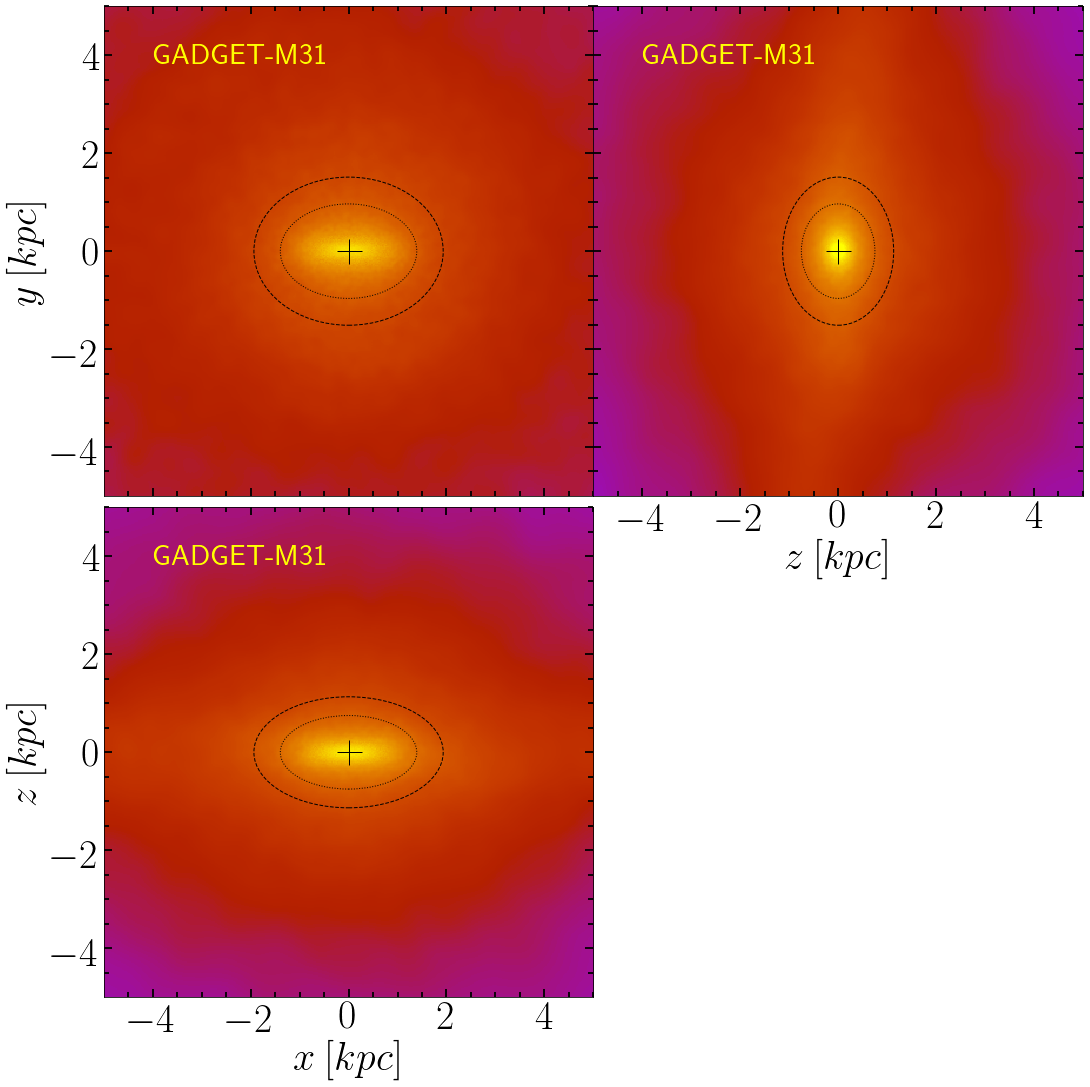

In [21]:
import sphviewer as sph
from __future__ import unicode_literals
import matplotlib.patches as patches

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

pos=np.ndarray([3,np.size(xn)])
pos[0,:]=xx
pos[1,:]=yy
pos[2,:]=zz
#---------------------generador del gráfico-----------------
rl=6   
corte1,=np.where((xx <rl) & (yy <rl) & (zz <rl) & (xx >-rl) & (yy >-rl) & (zz >-rl))

#-----rango que tiene la escala  de colores-----
vmin=1
vmax=7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='gnuplot'


fig=plt.figure(1,figsize=(16,16))
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.95, top = 0.95, wspace=0., hspace= 0)

particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,0]=fig.add_subplot(221)
ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,0].set_xlim(-5,5)
ax[0,0].set_ylim(-5,5)
ax[0,0].set_xticks([-4,-2,0,2,4])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$y\:[kpc]$', fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,0].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[0,0].add_patch(patches.Ellipse((0,0), width=2*lbar1[0], height=2*(B1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[0,0].add_patch(patches.Ellipse((0,0), width=2*lbar2[0], height=2*(B2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[0,0].plot(0,0,'k+', markersize=25, color='k')

particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],p=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,1]=fig.add_subplot(222)
ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,1].set_xlim(-5,5)
ax[0,1].set_ylim(-5,5)
ax[0,1].set_yticklabels([])
ax[0,1].set_xticks([-4,-2,0,2,4])
ax[0,1].set_xlabel('$z\:[kpc]$', fontsize=40)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,1].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[0,1].add_patch(patches.Ellipse((0,0), width=2*(C1/A1)*lbar1[0], height=2*(B1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[0,1].add_patch(patches.Ellipse((0,0), width=2*(C2/A2)*lbar2[0], height=2*(B2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[0,1].plot(0,0,'k+', markersize=25, color='k')


particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[1,0]=fig.add_subplot(223)
ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].set_xlim(-5,5)
ax[1,0].set_ylim(-5,5)
ax[1,0].set_xticks([-4,-2,0,2,4])
ax[1,0].set_ylabel('$z\:[kpc]$', fontsize=40)
ax[1,0].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[1,0].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[1,0].add_patch(patches.Ellipse((0,0), width=2*lbar1[0], height=2*(C1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[1,0].add_patch(patches.Ellipse((0,0), width=2*lbar2[0], height=2*(C2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[1,0].plot(0,0,'k+', markersize=25, color='k')


## tenform no normalizado 2 lbar

In [22]:
#----para lbar1--------------------------------------------------------------
limit1,=np.where(rstr < 2*lbar1[0])
tensor = ten.tenf(xx[limit1], yy[limit1], zz[limit1])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a1 = asort[2]
b1 = asort[1]
c1 = asort[0]

#----para lbar2--------------------------------------------------------------
limit2,=np.where(rstr < 2*lbar2[0])
tensor = ten.tenf(xx[limit2], yy[limit2], zz[limit2])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a2 = asort[2]
b2 = asort[1]
c2 = asort[0]

print 'lbar1=', lbar1[0],'a1=',a1,'b1=', b1, 'c1=',c1
print 'lbar2=', lbar2[0],'a2=',a2,'b2=', b2, 'c2=',c2

A1 = np.sqrt(a1)
B1 = np.sqrt(b1)
C1 = np.sqrt(c1)

print 'A1=', A1, 'B1=', B1, 'C1=', C1
print B1/A1, C1/A1, C1/B1

A2 = np.sqrt(a2)
B2 = np.sqrt(b2)
C2 = np.sqrt(c2)

print 'A2=', A2, 'B2=', B2, 'C2=', C2

print B2/A2, C2/A2, C2/B2

lbar1= 1.932973 a1= 0.945774468047 b1= 0.826602663916 c1= 0.42232410617
lbar2= 1.393409 a2= 0.590775311856 b2= 0.469933202973 c2= 0.243239565183
A1= 0.97250936656 B1= 0.909176915631 C1= 0.649864682969
0.934877284366 0.668234883195 0.714783527602
A2= 0.768619094126 B2= 0.685516741571 C2= 0.493193233107
0.891880967841 0.641661437864 0.719447393768


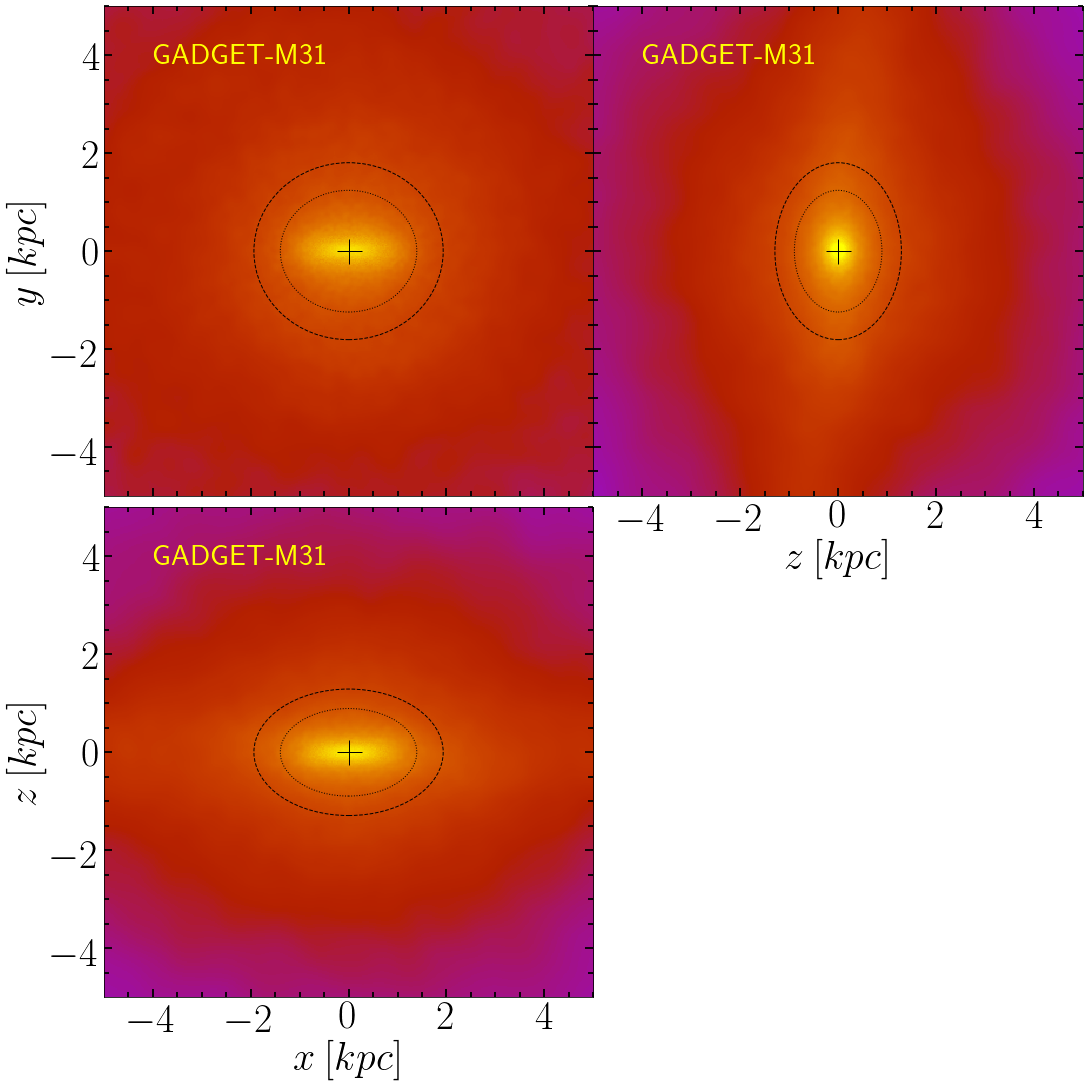

In [23]:
import sphviewer as sph
from __future__ import unicode_literals
import matplotlib.patches as patches

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

pos=np.ndarray([3,np.size(xn)])
pos[0,:]=xx
pos[1,:]=yy
pos[2,:]=zz
#---------------------generador del gráfico-----------------
rl=6   
corte1,=np.where((xx <rl) & (yy <rl) & (zz <rl) & (xx >-rl) & (yy >-rl) & (zz >-rl))

#-----rango que tiene la escala  de colores-----
vmin=1
vmax=7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='gnuplot'


fig=plt.figure(1,figsize=(16,16))
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.95, top = 0.95, wspace=0., hspace= 0)

particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,0]=fig.add_subplot(221)
ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,0].set_xlim(-5,5)
ax[0,0].set_ylim(-5,5)
ax[0,0].set_xticks([-4,-2,0,2,4])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$y\:[kpc]$', fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,0].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[0,0].add_patch(patches.Ellipse((0,0), width=2*lbar1[0], height=2*(B1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[0,0].add_patch(patches.Ellipse((0,0), width=2*lbar2[0], height=2*(B2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[0,0].plot(0,0,'k+', markersize=25, color='k')

particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],p=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,1]=fig.add_subplot(222)
ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,1].set_xlim(-5,5)
ax[0,1].set_ylim(-5,5)
ax[0,1].set_yticklabels([])
ax[0,1].set_xticks([-4,-2,0,2,4])
ax[0,1].set_xlabel('$z\:[kpc]$', fontsize=40)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,1].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[0,1].add_patch(patches.Ellipse((0,0), width=2*(C1/A1)*lbar1[0], height=2*(B1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[0,1].add_patch(patches.Ellipse((0,0), width=2*(C2/A2)*lbar2[0], height=2*(B2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[0,1].plot(0,0,'k+', markersize=25, color='k')


particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[1,0]=fig.add_subplot(223)
ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].set_xlim(-5,5)
ax[1,0].set_ylim(-5,5)
ax[1,0].set_xticks([-4,-2,0,2,4])
ax[1,0].set_ylabel('$z\:[kpc]$', fontsize=40)
ax[1,0].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[1,0].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[1,0].add_patch(patches.Ellipse((0,0), width=2*lbar1[0], height=2*(C1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[1,0].add_patch(patches.Ellipse((0,0), width=2*lbar2[0], height=2*(C2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[1,0].plot(0,0,'k+', markersize=25, color='k')


## tenform normalizado lbar

In [24]:
#----para lbar1--------------------------------------------------------------
limit1,=np.where(rstr < lbar1[0])
tensor = ten.tenfr(xx[limit1], yy[limit1], zz[limit1], mstr[limit1])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a1 = asort[2]
b1 = asort[1]
c1 = asort[0]

#----para lbar2--------------------------------------------------------------
limit2,=np.where(rstr < lbar2[0])
tensor = ten.tenfr(xx[limit2], yy[limit2], zz[limit2], mstr[limit2])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a2 = asort[2]
b2 = asort[1]
c2 = asort[0]

print 'lbar1=', lbar1[0],'a1=',a1,'b1=', b1, 'c1=',c1
print 'lbar2=', lbar2[0],'a2=',a2,'b2=', b2, 'c2=',c2

A1 = np.sqrt(a1)
B1 = np.sqrt(b1)
C1 = np.sqrt(c1)

print 'A1=', A1, 'B1=', B1, 'C1=', C1
print B1/A1, C1/A1, C1/B1


A2 = np.sqrt(a2)
B2 = np.sqrt(b2)
C2 = np.sqrt(c2)

print 'A2=', A2, 'B2=', B2, 'C2=', C2
print B2/A2, C2/A2, C2/B2

lbar1= 1.932973 a1= 0.543968 b1= 0.272781 c1= 0.183252
lbar2= 1.393409 a2= 0.55642 b2= 0.261192 c2= 0.182388
A1= 0.737542 B1= 0.522284 C1= 0.428079
0.708142 0.580413 0.819629
A2= 0.745936 B2= 0.51107 C2= 0.427069
0.685139 0.572528 0.835638


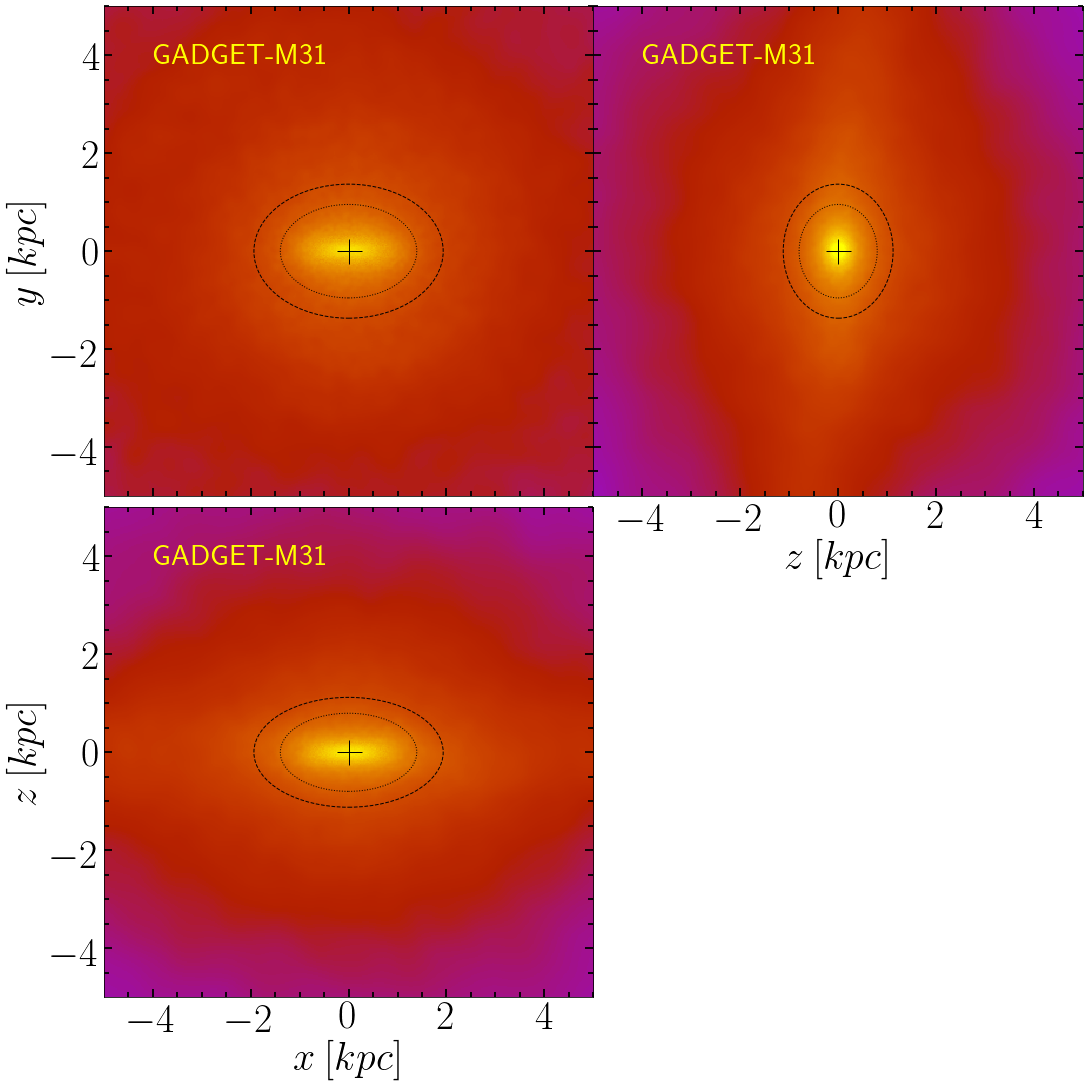

In [25]:
import sphviewer as sph
from __future__ import unicode_literals
import matplotlib.patches as patches

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

pos=np.ndarray([3,np.size(xn)])
pos[0,:]=xx
pos[1,:]=yy
pos[2,:]=zz
#---------------------generador del gráfico-----------------
rl=6   
corte1,=np.where((xx <rl) & (yy <rl) & (zz <rl) & (xx >-rl) & (yy >-rl) & (zz >-rl))

#-----rango que tiene la escala  de colores-----
vmin=1
vmax=7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='gnuplot'


fig=plt.figure(1,figsize=(16,16))
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.95, top = 0.95, wspace=0., hspace= 0)

particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,0]=fig.add_subplot(221)
ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,0].set_xlim(-5,5)
ax[0,0].set_ylim(-5,5)
ax[0,0].set_xticks([-4,-2,0,2,4])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$y\:[kpc]$', fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,0].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[0,0].add_patch(patches.Ellipse((0,0), width=2*lbar1[0], height=2*(B1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[0,0].add_patch(patches.Ellipse((0,0), width=2*lbar2[0], height=2*(B2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[0,0].plot(0,0,'k+', markersize=25, color='k')

particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],p=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,1]=fig.add_subplot(222)
ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,1].set_xlim(-5,5)
ax[0,1].set_ylim(-5,5)
ax[0,1].set_yticklabels([])
ax[0,1].set_xticks([-4,-2,0,2,4])
ax[0,1].set_xlabel('$z\:[kpc]$', fontsize=40)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,1].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[0,1].add_patch(patches.Ellipse((0,0), width=2*(C1/A1)*lbar1[0], height=2*(B1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[0,1].add_patch(patches.Ellipse((0,0), width=2*(C2/A2)*lbar2[0], height=2*(B2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[0,1].plot(0,0,'k+', markersize=25, color='k')


particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[1,0]=fig.add_subplot(223)
ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].set_xlim(-5,5)
ax[1,0].set_ylim(-5,5)
ax[1,0].set_xticks([-4,-2,0,2,4])
ax[1,0].set_ylabel('$z\:[kpc]$', fontsize=40)
ax[1,0].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[1,0].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[1,0].add_patch(patches.Ellipse((0,0), width=2*lbar1[0], height=2*(C1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[1,0].add_patch(patches.Ellipse((0,0), width=2*lbar2[0], height=2*(C2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[1,0].plot(0,0,'k+', markersize=25, color='k')


## tenform normalizado 2lbar

In [26]:
#----para lbar1--------------------------------------------------------------
limit1,=np.where(rstr < 2*lbar1[0])
tensor = ten.tenfr(xx[limit1], yy[limit1], zz[limit1], mstr[limit1])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a1 = asort[2]
b1 = asort[1]
c1 = asort[0]

#----para lbar2--------------------------------------------------------------
limit2,=np.where(rstr < 2*lbar2[0])
tensor = ten.tenfr(xx[limit2], yy[limit2], zz[limit2], mstr[limit2])

matriz = linalg.eig(tensor)
autov  = matriz[0]

asort  = np.sort(autov)

a2 = asort[2]
b2 = asort[1]
c2 = asort[0]

print 'lbar1=', lbar1[0],'a1=',a1,'b1=', b1, 'c1=',c1
print 'lbar2=', lbar2[0],'a2=',a2,'b2=', b2, 'c2=',c2

A1 = np.sqrt(a1)
B1 = np.sqrt(b1)
C1 = np.sqrt(c1)

print 'A1=', A1, 'B1=', B1, 'C1=', C1
print B1/A1, C1/A1, C1/B1

A2 = np.sqrt(a2)
B2 = np.sqrt(b2)
C2 = np.sqrt(c2)

print 'A2=', A2, 'B2=', B2, 'C2=', C2
print B2/A2, C2/A2, C2/B2

lbar1= 1.932973 a1= 0.515025 b1= 0.298612 c1= 0.186363
lbar2= 1.393409 a2= 0.526223 b2= 0.288755 c2= 0.185023
A1= 0.717652 B1= 0.546454 C1= 0.431698
0.761447 0.601543 0.789999
A2= 0.725412 B2= 0.537359 C2= 0.430143
0.740764 0.592963 0.800475


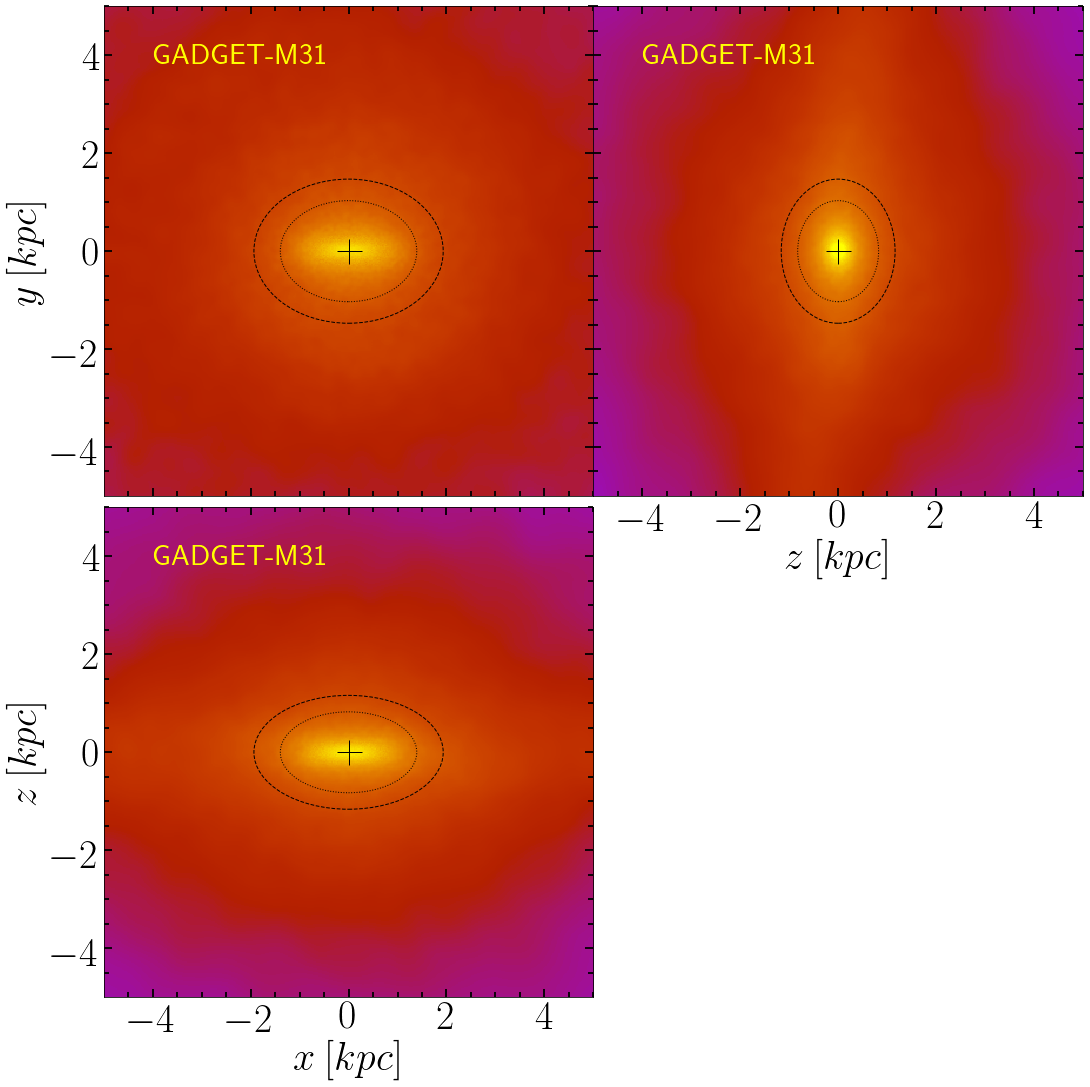

In [27]:
import sphviewer as sph
from __future__ import unicode_literals
import matplotlib.patches as patches

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

pos=np.ndarray([3,np.size(xn)])
pos[0,:]=xx
pos[1,:]=yy
pos[2,:]=zz
#---------------------generador del gráfico-----------------
rl=6   
corte1,=np.where((xx <rl) & (yy <rl) & (zz <rl) & (xx >-rl) & (yy >-rl) & (zz >-rl))

#-----rango que tiene la escala  de colores-----
vmin=1
vmax=7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='gnuplot'


fig=plt.figure(1,figsize=(16,16))
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.95, top = 0.95, wspace=0., hspace= 0)

particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,0]=fig.add_subplot(221)
ax[0,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,0].set_xlim(-5,5)
ax[0,0].set_ylim(-5,5)
ax[0,0].set_xticks([-4,-2,0,2,4])
ax[0,0].set_xticklabels([])
ax[0,0].set_ylabel('$y\:[kpc]$', fontsize=40)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,0].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[0,0].add_patch(patches.Ellipse((0,0), width=2*lbar1[0], height=2*(B1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[0,0].add_patch(patches.Ellipse((0,0), width=2*lbar2[0], height=2*(B2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[0,0].plot(0,0,'k+', markersize=25, color='k')

particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],p=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[0,1]=fig.add_subplot(222)
ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[0,1].set_xlim(-5,5)
ax[0,1].set_ylim(-5,5)
ax[0,1].set_yticklabels([])
ax[0,1].set_xticks([-4,-2,0,2,4])
ax[0,1].set_xlabel('$z\:[kpc]$', fontsize=40)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,1].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[0,1].add_patch(patches.Ellipse((0,0), width=2*(C1/A1)*lbar1[0], height=2*(B1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[0,1].add_patch(patches.Ellipse((0,0), width=2*(C2/A2)*lbar2[0], height=2*(B2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[0,1].plot(0,0,'k+', markersize=25, color='k')


particles=sph.Particles(pos[:,corte1],mstr[corte1]*1e10,nb=50)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax[1,0]=fig.add_subplot(223)
ax[1,0].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax[1,0].set_xlim(-5,5)
ax[1,0].set_ylim(-5,5)
ax[1,0].set_xticks([-4,-2,0,2,4])
ax[1,0].set_ylabel('$z\:[kpc]$', fontsize=40)
ax[1,0].set_xlabel('$x\:[kpc]$', fontsize=40)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[1,0].text(-4, 4,'GADGET-M31', fontsize=30, color='yellow', ha='left', va='center') 
ax[1,0].add_patch(patches.Ellipse((0,0), width=2*lbar1[0], height=2*(C1/A1)*lbar1[0], fill=False, color='k', ls='--'))
ax[1,0].add_patch(patches.Ellipse((0,0), width=2*lbar2[0], height=2*(C2/A2)*lbar2[0], fill=False, color='k', ls=':'))
ax[1,0].plot(0,0,'k+', markersize=25, color='k')
